<a href="https://colab.research.google.com/github/in04436r/Car-Crash-Severeity/blob/master/Applied_DS_Capstone_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Collision Analysis (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In our daily busy lives, we are almost inseparable from technology when it comes to travelling. Public and private transportation systems play a very crucial role in our daily lives.
How many times has it happened, that you are driving home from your work, after a tiresome day, and as soon as you hit the main road, there is a traffic jam. So you peep out of your window and learn that there has been an accident.
Indeed accidents or collisions are not only unpleasent scenarios but also quite costly affairs when it comes to harm to life or property.
The objective of my project is to understand what are the various types of collisions(accidents) that can occur from a given data set and which of them are the most severe ones. 
Based on this information I will try to build a model, that can classify this collision and also tell us which factors contribiute most to such type of collisions.


## Data <a name="data"></a>

To achieve this goal, I have accquired a publicly available dataset of Seattle that captures all the collisions that have taken place between 2004 and 2013, in Seattle.
This dataset contains various features and attribiutes that can contribiute to the potential severity of a crash. 
One column that peeked my interest was the **COLLISIONTYPE** column. This column holds information for the types of different collisions that have occured.
Apart from this to measure the severity of a collision, we have another column called the **SEVERITYDESC** which holds the description of the severity and the **SEVERITYCODE** which holds the corresponding code.
My idea was to check which type of collision has the strongest correlation with the SEVERITY parameters. Based on this information, we will try to classify the most severe type of collision and find what are the features that contribiute to this.

## Methodology <a name="methodology"></a>

The first step when working with this dataset, was to list out all the columns and their datatypes. We see that we are dealing with mostly object type (categorical variables). 
Below is a list of all the columns that are of my interest for this exercise.

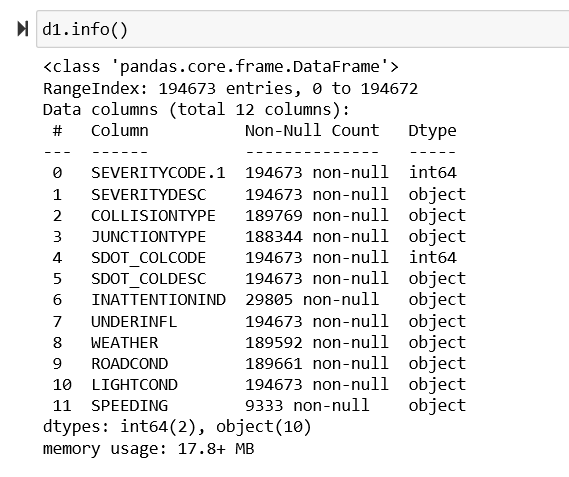

Once the required columns were identified, the next step was to account for the missing values to see how much of an impact it would have on our analysis, if we left it as it is, or do we need to fill the missing values, or do we need to drop them completely.

Once I was clear with my goal,I cleaned the data such that the NaN values do not cause any drastic impact on my analysis.



Based on the available data, the first step is to identify the distribiution of the **COLLISIONTYPE**. I visualized the data and drew the insight that there are three types of clashes that were the most frequent ones -- Parked Car, Angles and Rear Ended. The general assumption however, would have been that a more severe collision occurs when pedastrian is hit. This was not the case.
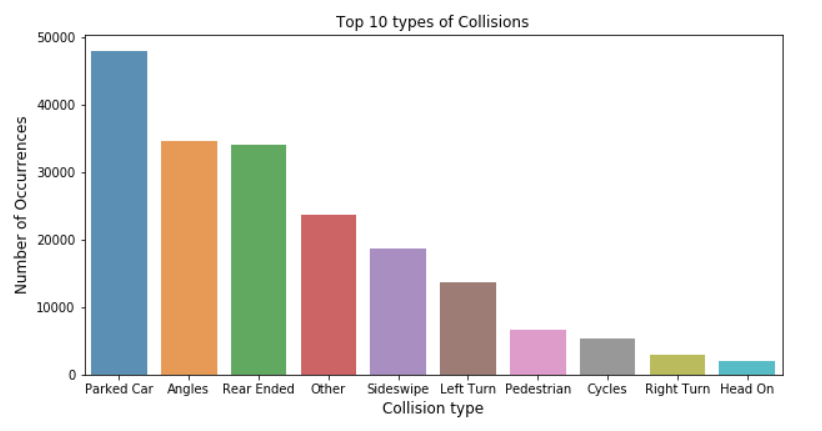

Now, in order to describe the most severe type of collision, I split my datatset first into target and feature sets. To achieve this, I had to undertsand what are the factors that could contribiute to a collision. Based on uderstanding the data, I found some useful columns like Road condition, Light condition, Weather, Under Influence etc.
Once these columns are identified, I made sure that these columns should have the least amount of unknown values.

Once the unknown values were modified, I then proceeded to describe my target and feature set. From my problem, it is evident that I am trying to ppredict a specific type of collision. So **COLLISIONTYPE** was my target and the others were collectively called my Feature Set.
But there is a challenge...I cannot predict directly for categorical variables.
For the uninitiated, categorical variables are string objects. To work around this problem, I implemented something called **ONE HOT ENCODING**.

One hot encoding is a process by which categorical 
variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Since our target column is a categorical variable, we implent onehot encoding to build a decision tree.

This process will actually split up all the index values of the **COLLISIONTYPE** column into separate columns, with each index value as a separate column. They will contain integer values. These values will later help us in building the decision tree model.

Applying One Hot Encoding on my Target Set, Feature Set and Severity Set, I extracted different dataframes. 
Now to figure out which type of collision is actually the most severe type, I tried to deduce a correlation between the Target Set (dataframe containing all the collision types as individual columns) and the Severity Set.
What I found was that rear ended collisions had the highest positive correlation with the severity set, than any other type of collision , meaning, Rear Ended Collisions are the more severe types.
So from here on, it became very evident on what column I wanted to split my decision tree on.

## Analysis <a name="analysis"></a>

Now the fun bit..

Once my target was selected, I proceeded to split my dataset into training and testing set at a ration of 0.8:0.2.
I fed my training data into the decision tree classifier (available from the SciKitLearn package) and obtained my predicted results.
These results will be further more used to compare with my test results to determine the accuracy of model.


The accuracy I got for the decision tree classifier was :
 **Accuracy Score Train: 0.8086722572525652
Accuracy Score Test: 0.8098369076666239**

This seems like a good score, and i was satisfied with it.

Furthermore, I also used the ROC_AUC curve to double check the accuracy of my model. The ROC_AUC yeilded a value of 0.62 which was a decent enough score for my model.
I also implemented a Confusion Matrix to check for the precision, accuracy, recall and the f1 score.
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

I also implemented a Logistic Regression model on the same dataset, to provide a comparision between the two classifier models. I also implemented the same model evaluation technique (Confusion Matrix and ROC curve) for both.
And as per my expectation, the Decision Tree model performed a lot better than the Logistic Regression Model. It is evodent from the below given confusion metrics and ROC curves that, altough both the models have almost similar F1 scores, the decision tree model outperforms the Logistic Regression Model in terms of precision.

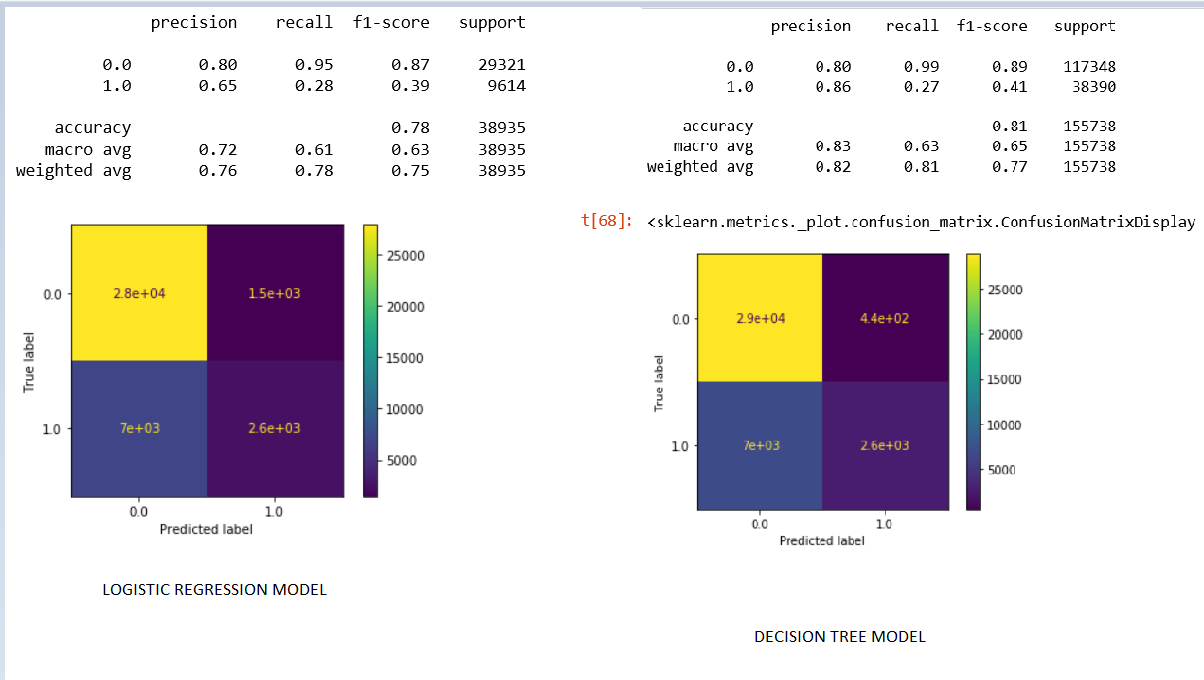

Once I had evaluated both the models, and convinced with the results, I proceeded to build my decision tree.

After building my decision tree, it was time to slowly proceed towards unconvering the factors that result in REAR ENDED COLLISIONS.
In the decision tree evaluation, we have an option to visualise the most important features. I implemented this technique to figure out which was my most impactful feature that has contribiuted to a REAR ENDED COLLISION.

I used the feature_importances_ function to extract a numerical value for each of the features in my feature set.
My results were such that three factors contribiuted most -- **JUNCTIONTYPE , LIGHTCOND and WEATHER**

To put it simply, most of the REAR ENDED collisions depended on the type of the intersection, the lighting conditions and the weather conditions.

Sounds pretty usual right? Keep reading..

## Results and Discussion <a name="results"></a>

From my analysis, I got a pretty interesting find.
The top 3 reasons that contribiute to REAR ENDED collisions are :


1.   Junction Type : Category of junction at which collision took place 
2.   Weather conditions
3.   Light Conditions

These seem pretty common reasons for any collision, but what was interesting was the distribiution of these features. From my analysis, we understand that Rear Ended collisions occur the most on open roads (that's not an interesection), in clear weather conditions and in broad daylight.
Below are three visualizations that represent this distribiution.

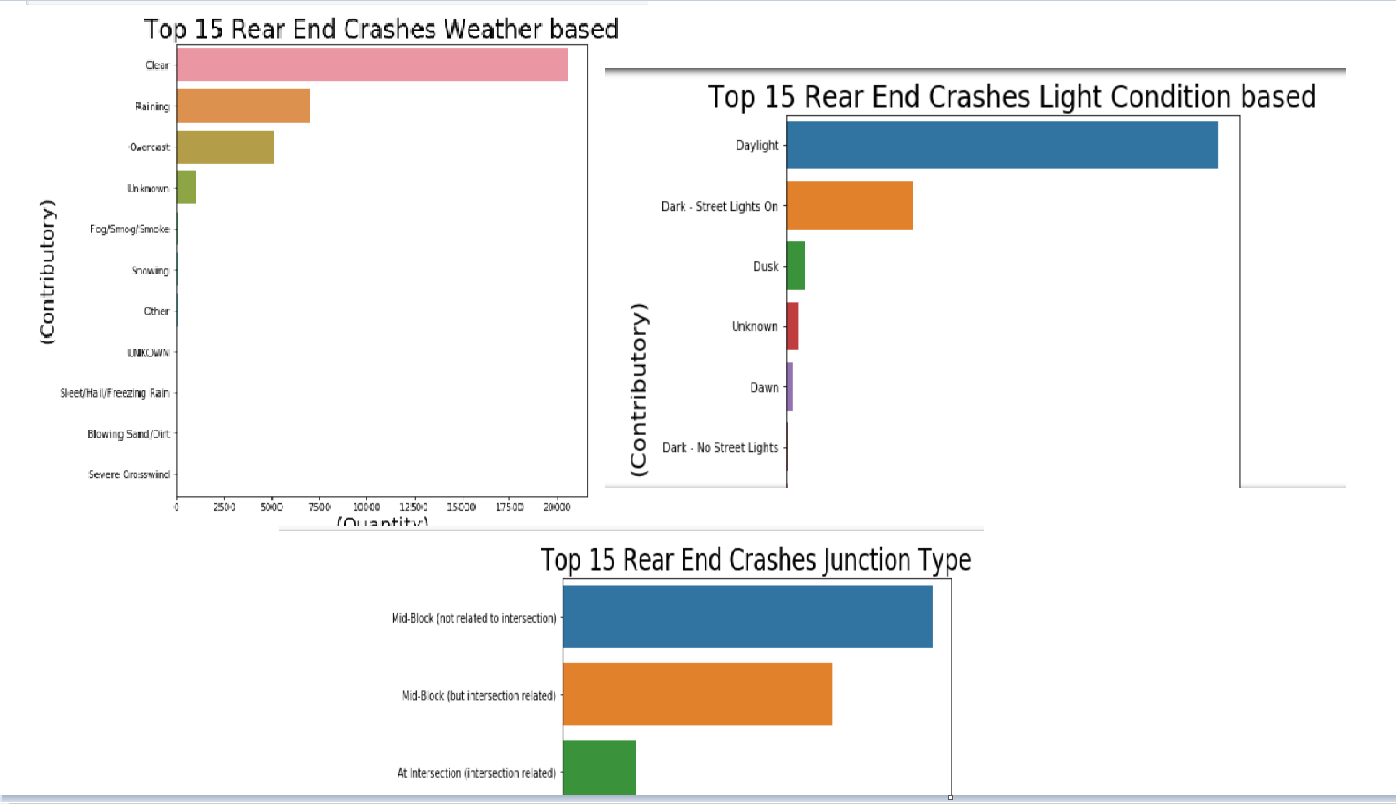


## Conclusion <a name="conclusion"></a>

So, from this above analysis it is clear that although there are a lot of other factors that could impact the severity of a car crash, it is the fundamental elements of driving that contribiute more to car crashes. 
Hence following driving protocols, being mindful and alert could not only reduce the number of crashes, but can also potentially save lives.
